<a href="https://colab.research.google.com/github/shivam231129/book-publish-practice-/blob/main/book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem statement**
the problem is about analysing the given dataset and create some story. the target variable was considered as over_18columns as per my understanding and all the research revolve around this.  

##**Dataset details**
- dataset consist of columns 

    Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 -   **time_created  509236 non-null  int64**  time when book  is created 
 -   **date_created  509236 non-null  object** date  when book is created
 -   **up_votes      509236 non-null  int64**  the votes given to the book it shows how much the book is being liked 
 -   **down_votes    509236 non-null  int64** dislikes given to book
 -   **title         509236 non-null  object** title of book which tell the description what the book actually is
 -   **over_18       509236 non-null  bool** this is being considered as our target variable since it is not given what to choose as target so for the best of my idea this was perfect to be choosen as target variable its a bollean type and shows which book is for readers below 18 and above 18.

 -   **author        509236 non-null  object** itsb name of theauthor who wrote the booki  
 -   **category      509236 non-null  object** category whether it is worldwide 

- memory usage: 27.7+ MB


##**time constraints**
it should be not too slow not too fast as some of the delays are acceptable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import re

# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os

In [4]:
#loading csv file
result=pd.read_csv("/content/drive/MyDrive/Eluvio_DS_Challenge.csv")

In [5]:
result

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [6]:
set(result['down_votes'])

{0}

In [7]:
set(result['category'])

{'worldnews'}

In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


### **Observation**
- clearly above data shows the information about all the columns
- all the columns are filled that is none of the columns consist of **"nan"** values
- here three types of data-types can be seen in the above record **int ,object ,bool**



In [9]:
result['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

## **Exploratory data analysis**


### **Author**

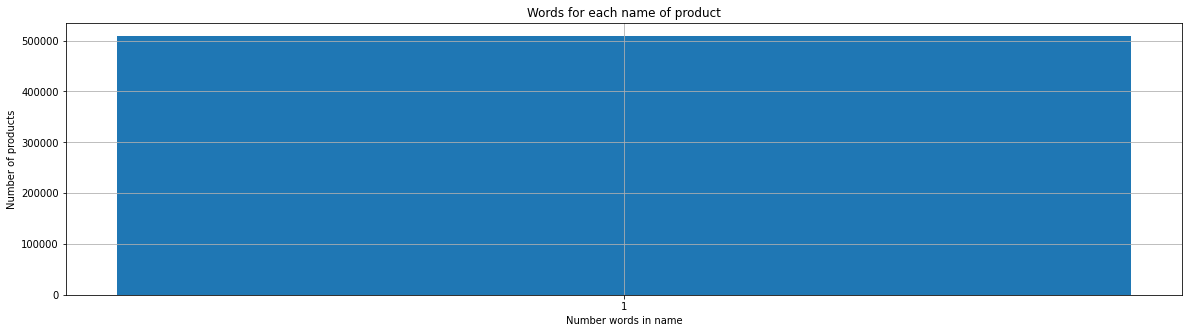

In [10]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = result['author'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('Number words in name')
plt.title('Words for each name of product')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


In [11]:
print("length count", word_count)
print("unique authors", len(set(result['author'])))

length count 1    509236
Name: author, dtype: int64
unique authors 85838


### **Observation**
- according to above grapth and data the length of name of author is one 
- there are 85838 unique authors present in our datset
- it can be concluded many authors have wrote more than one books 
- it might so happen an author can worte book which are above and lower 18 
 

In [12]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = result['author'].value_counts()[:10]


### **Author and book count**

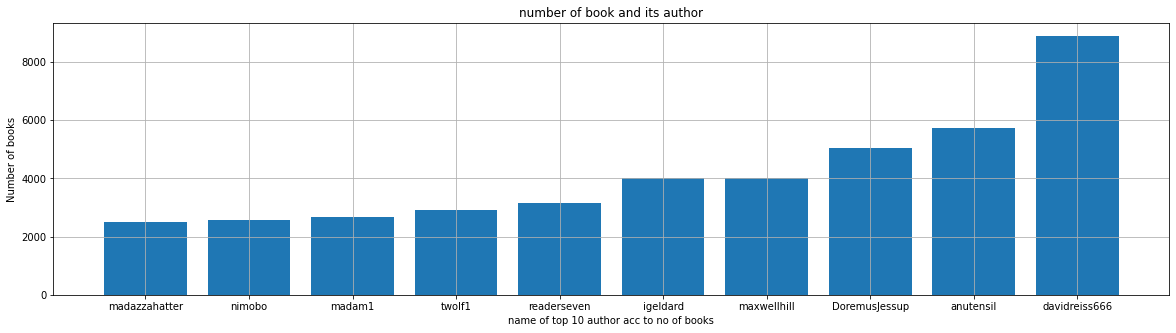

In [13]:
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of books')
plt.xlabel('name of top 10 author acc to no of books')
plt.title('number of book and its author')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


### **Observation**
- The above plot shows top 10 author with with number of book publsh as to make plot tidy I considered only top 10 counts
- The range of number of book written by author  varies from 1 to 8897 as to make plot tidy I considered only top 10 counts

- In above only top 10 author   are considered along with  number of book publish
- there are 85838 unique authors present in our datset

### **Title**


### **Word count in title**

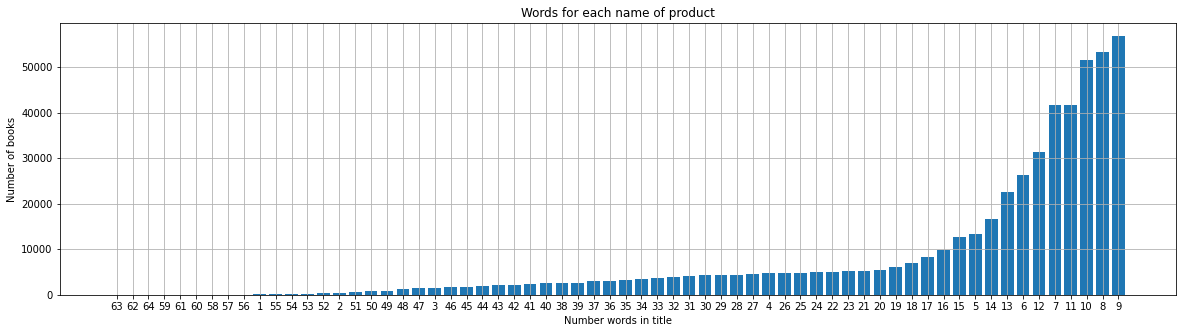

In [14]:

#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = result['title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of books')
plt.xlabel('Number words in title')
plt.title('Words for each name of product')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


In [15]:
word_count

9     56822
8     53234
10    51533
11    41727
7     41568
      ...  
59        6
61        6
63        1
62        1
64        1
Name: title, Length: 64, dtype: int64

### **Observation**
- 56822 books are their which word length 9
- 3 books are their which consist of title length 1 
- title length ranges from 1 to 64
- books with small title length are more as compared to large title length which can be viewed in above plot which explains the length of title in decreasing order 
-  according to above curve and data the largest or maximum book have title length 9 
- minimum number of book have title length 64,63,64

### **Upvote**

In [16]:
result['up_votes'].value_counts()

0       93555
1       46619
2       44195
3       36112
4       29917
        ...  
6196        1
6881        1
6509        1
4850        1
3806        1
Name: up_votes, Length: 5782, dtype: int64

### **Observation**
- the above data shows or gives answer how many books receives zero rating or 1 rating and so on
- 93555 books were their which receives 0 rattings 
- 1 books exist which receive 6196 rattings,6881 rattings,6509 rattings , 4850 rattings , 3806 rattings

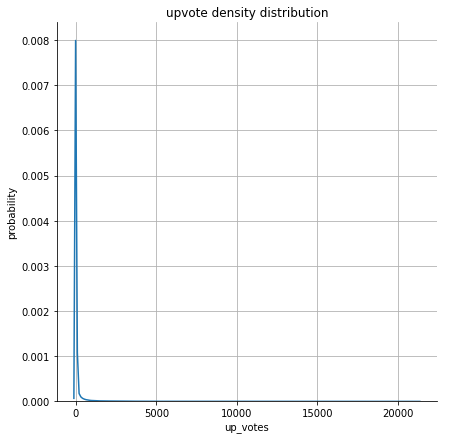

[9.84368741e-01 1.06787423e-02 3.89799621e-03 9.68116944e-04
 7.26578639e-05 7.85490421e-06 3.92745210e-06 0.00000000e+00
 0.00000000e+00 1.96372605e-06]
[    0.   2125.3  4250.6  6375.9  8501.2 10626.5 12751.8 14877.1 17002.4
 19127.7 21253. ]


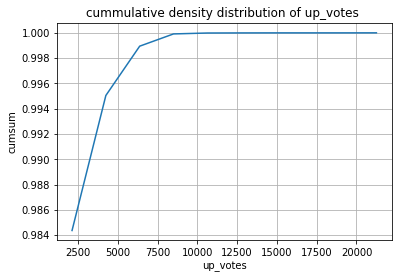

In [17]:
sns.FacetGrid(result,size=6) \
    .map(sns.kdeplot,"up_votes") \
    .add_legend();
plt.title('upvote density distribution')

plt.ylabel('probability')
plt.grid(); 

plt.show();



# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(result['up_votes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.title('cummulative density distribution of up_votes ')
plt.xlabel('up_votes')
plt.ylabel('cumsum')
 
plt.grid();
plt.show();

### **Observation**
- the above plot are pdf and cdf of up_votes
- pdf able to explain the density of books are maximum near zero or smaller values 
- 99.7% of books recieve ratings less than equal to 7500
- this cdf  able to explain that some books receive the number of up_votes greater than 10k which clearly explains the variation in our data 

In [18]:
result[result['up_votes']>=7500]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
187603,1370655122,2013-06-08,10159,0,What we have... is... concrete proof of U.S.-...,False,dantesinfer,worldnews
206253,1377038626,2013-08-20,7700,0,British PM David Cameron told a member of his ...,False,waggawagga,worldnews
326108,1417646102,2014-12-03,9303,0,"NASA officially announces Manned Mars Mission,...",False,Herman999999999,worldnews
329371,1418827992,2014-12-17,8187,0,The United States will normalize diplomatic re...,False,i_love_fsa,worldnews
352692,1426242655,2015-03-13,8781,0,"German anti-vaccer wagers € 100,000 to anyone ...",False,bendertheoffender22,worldnews
...,...,...,...,...,...,...,...,...
506536,1478907186,2016-11-11,8281,0,President Kuczynski: Peru to plant 2 million h...,False,so_mindfucked,worldnews
506857,1479079701,2016-11-13,8132,0,"China, Japan, Russia, & South Korea have just ...",False,dustofoblivion123,worldnews
507297,1479214734,2016-11-15,7861,0,Google will soon ban fake news sites from usin...,False,anutensil,worldnews
508164,1479428970,2016-11-18,7549,0,Slovenia adds water to constitution as fundame...,False,HeroAntagonist,worldnews


In [19]:
result.shape

(509236, 8)

In [20]:
print("% of data less thsn rating 7500= " , (1-(result[result['up_votes']>=7500].shape[0]/result.shape[0]))*100)

print("% of data less thsn rating 10000= " , (1-(result[result['up_votes']>=10000].shape[0]/result.shape[0]))*100)

print("% of data less thsn rating 22000= " , (1-(result[result['up_votes']>=22000].shape[0]/result.shape[0]))*100)
print("maximum ratting receive =" ,result["up_votes"].max())

% of data less thsn rating 7500=  99.97309695308265
% of data less thsn rating 10000=  99.99705441092146
% of data less thsn rating 22000=  100.0
maximum ratting receive = 21253


### **Observation**
- total 137 records available which have rattings greater than 7500
- which is 0.01 % of total data
- % of data less thsn rating 7500=  99.97309695308265
- % of data less thsn rating 10000=  99.99705441092146
- this was able to explain by cdf roughly 
- % of data less thsn rating 22000=  100.0
- that is precisely correct as maximum ratting receive by any book is  = 21253


### **Date and time**

In [21]:
import datetime
# year
# month 
# day
#efficient way to extract year from string format date
result['year'] = pd.DatetimeIndex(result['date_created']).year
result['month'] = pd.DatetimeIndex(result['date_created']).month
result['day'] = pd.DatetimeIndex(result['date_created']).day
result.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,month,day
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,1,25
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,1,25
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,1,25
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,1,25
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,1,25


In [22]:
result['year'].value_counts()

2015    94621
2014    92030
2013    88231
2016    81892
2012    42643
2011    38886
2009    25115
2010    23313
2008    22505
Name: year, dtype: int64

### **number of book publish or written in  year**

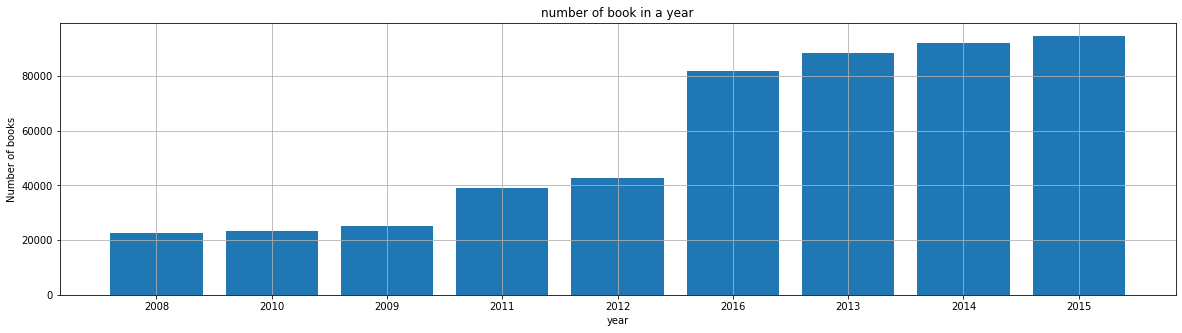

2015    94621
2014    92030
2013    88231
2016    81892
2012    42643
2011    38886
2009    25115
2010    23313
2008    22505
Name: year, dtype: int64


In [23]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = result['year'].value_counts()

word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of books')
plt.xlabel('year')
plt.title('number of book in a year')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


print(word_count)


### **Observation**
- the above data and plot explains the year and the number of books in that year
- clearly 2015 have maximum number of published
- the year ranges from 2008 to 2016 


### **over_18**

In [24]:
print("count of books which are for above 18 and for less than 18 are ")
print(result["over_18"].value_counts())

count of books which are for above 18 and for less than 18 are 
False    508916
True        320
Name: over_18, dtype: int64


### **Observation**
- clearly observed that data consist of books for below 18 are significantly higher than above 18
- below 18 number of books = 508916
- above 18 number of books = 320 

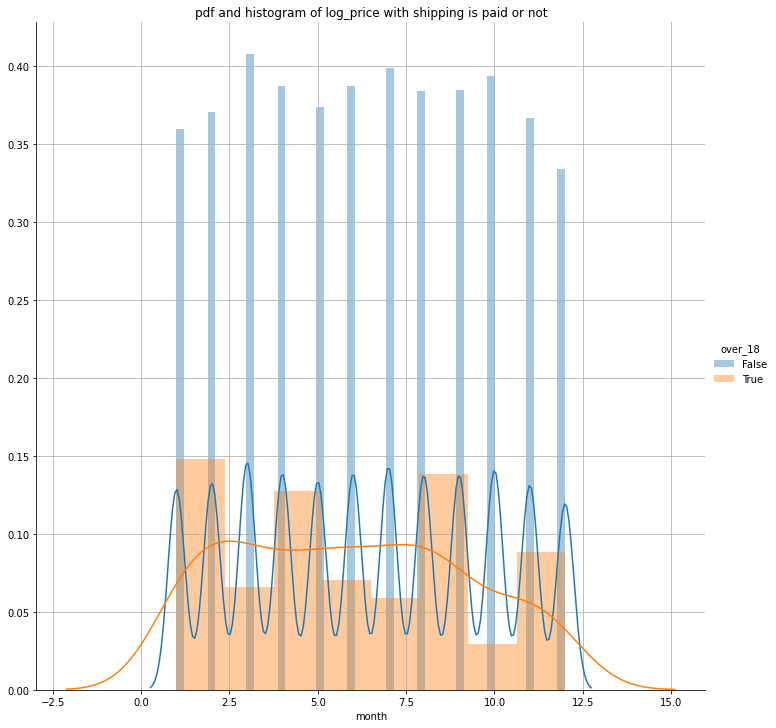

In [25]:
sns.FacetGrid(result,hue="over_18",size=10) \
   .map(sns.distplot, "month") \
   .add_legend();
plt.title('pdf and histogram of log_price with shipping is paid or not')
plt.grid();
plt.show();

### **Observation**
- the above is pdf and histogram of months and the number of books which are above and below 18 in that month
- books for below 18 are more frequent compare to above 18
- and nothing can be observed except the first point lets break the dataset into above and below 18 and observed them separately 

In [26]:
c=result[result['over_18']==False]# below 18
d=result[result['over_18']==True]# above 18

In [27]:
d

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,month,day
1885,1206381438,2008-03-24,189,0,Pics from the Tibetan protests - more graphic ...,True,pressed,worldnews,2008,3,24
6721,1211138718,2008-05-18,5,0,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",True,alllie,worldnews,2008,5,18
8414,1212694925,2008-06-05,0,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch,worldnews,2008,6,5
12163,1216672016,2008-07-21,0,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch,worldnews,2008,7,21
12699,1217381380,2008-07-30,5,0,IDF kills young Palestinian boy. Potentially N...,True,cup,worldnews,2008,7,30
...,...,...,...,...,...,...,...,...,...,...,...
503776,1477889966,2016-10-31,4,0,Latest Italian Earthquake Devastates Medieval ...,True,pixelinthe,worldnews,2016,10,31
508067,1479400229,2016-11-17,12,0,ISIS Release Video Showing Melbourne As A Poss...,True,halacska,worldnews,2016,11,17
508176,1479434681,2016-11-18,0,0,Animal welfare activists have released footage...,True,NinjaDiscoJesus,worldnews,2016,11,18
508376,1479492875,2016-11-18,6,0,Jungle Justice : Public lynching of a street ...,True,avivi_,worldnews,2016,11,18


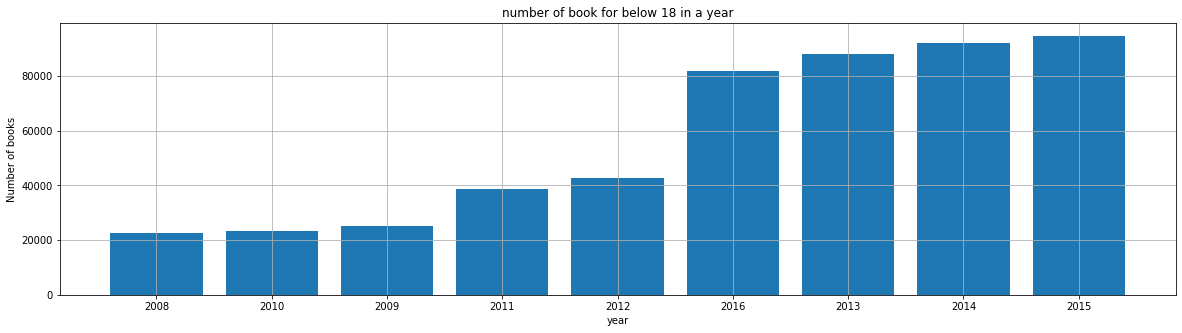

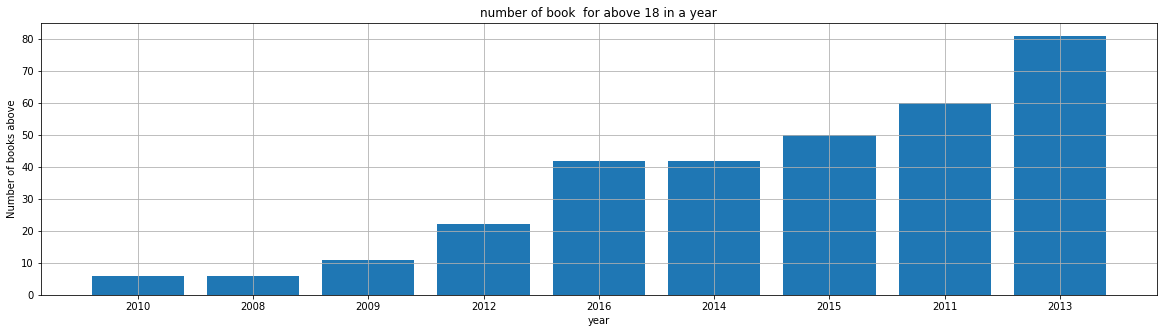

In [28]:
# count number of bokks above and below 18 are publish in given year
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = c['year'].value_counts()

word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of books')
plt.xlabel('year')
plt.title('number of book for below 18 in a year')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()



#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = d['year'].value_counts()

word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of books above')
plt.xlabel('year')
plt.title('number of book  for above 18 in a year')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()

In [29]:
print("books publish in year for below 18 ",c['year'].value_counts())
print("books publish in year for below 18 ",d['year'].value_counts())

books publish in year for below 18  2015    94571
2014    91988
2013    88150
2016    81850
2012    42621
2011    38826
2009    25104
2010    23307
2008    22499
Name: year, dtype: int64
books publish in year for below 18  2013    81
2011    60
2015    50
2016    42
2014    42
2012    22
2009    11
2010     6
2008     6
Name: year, dtype: int64


### **Observation**
- the above two plot is the visualization of number of books  publish in a year
- the first plot number of books for below 18 publish in year
-  the second plot number of books for above 18 publish in year
- the stats were shown above how many books were publish in given year


### **author who wrote books for above 18 and below 18 readers**

In [30]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count1 = c['author'].value_counts()
word_count2 = d['author'].value_counts()

print("author publish above 18 " , word_count1)
print("************************")

print("author publish below 18 " , word_count2)

print("************************")
# comman author who publish both type of book
a1=set(d['author'])
a2=set(c['author'])
print("comman author", a1.intersection(a2))
print("number of authors", len(a1.intersection(a2)))

author publish above 18  davidreiss666    8897
anutensil        5730
DoremusJessup    5037
maxwellhill      4023
igeldard         4013
                 ... 
Aiman_D             1
zorsiK              1
Kalidasojk          1
Mitchell_kid        1
The_Noob_OP         1
Name: author, Length: 85754, dtype: int64
************************
author publish below 18  readerseven          6
ScotiaTide           4
Rocker13666          4
SyrianGuy            4
orangeflower2015     3
                    ..
Another-Chance       1
StormXMX             1
TheFrontPageSucks    1
PoopyTitties         1
natural_capital      1
Name: author, Length: 285, dtype: int64
************************
comman author {'yellowcakewalk', 'schar', 'CallmeishmaelSancho', 'crea7or', 'IsleCook', 'blinkergoesleft', 'jewiscool', 'cavehobbit', 'SyrianGuy', 'Charlatan2', 'anthonykantara', 'lovefordoge', 'CratusRedditus', 'hcadvkd', 'downtown14', 'EntreRios', 'NiceGuyJoe', 'unholyslacker', 'LPanaflex', 'cgray94', 'Ms_Temagami', 'Ma

In [31]:
result["over_18"] 

0         False
1         False
2         False
3         False
4         False
          ...  
509231    False
509232    False
509233    False
509234    False
509235    False
Name: over_18, Length: 509236, dtype: bool

### **Observation**
- number of author who wrote both kind of book are 201
- stats shown number of books written by authors in both types
- clearly number of book written by author which are above 18 is more than below 18


In [32]:
result["over_18"] = result["over_18"].astype(int)

## **Feature extraction**
- name of author and title are very important features
- considering the output variable as above_18
 

In [33]:
import cv2
import pandas as pd
import numpy as np
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
# Train your own Word2Vec model using your own text corpus
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os

from collections import Counter
from sklearn.model_selection import train_test_split


In [34]:
# splitting the dataset
Y= result['over_18']
X_train, X_test, y_train, y_test = train_test_split(result, Y, test_size=0.33,stratify=Y)


## **Author**
###**onehot encode for author**

In [ ]:

'''encoding author one hot'''
from collections import Counter
my_counter = Counter()
for word in X_train['author'].values:
 my_counter.update(word.split(","))

author_dict = dict(my_counter)
author_dict = dict(sorted(author_dict.items(), key=lambda kv: kv[1]))
enc2 = CountVectorizer(vocabulary=list(author_dict.keys()), lowercase=False, binary=True)
enc2.fit(X_train['author'].values) # fit has to happen only on trai
# we use the fitted CountVectorizer to convert the text to vector
X_train_brand = enc2.transform(X_train['author'].values)
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np
X_test_brand = enc2.transform(X_test['author'].values)
print("After vectorizations")
print(X_train_brand.shape, y_train.shape)
print(X_test_brand.shape, y_test.shape)

print("="*100)


After vectorizations
(341188, 66290) (341188,)
(168048, 66290) (168048,)


## **Title**
###**tfidf word to vector for title**

In [ ]:
# Ref: AAIC Notebook for Donors' Choose
def decontracted(sent):
    '''
    Task:   This Function changes common short forms like can't, won't to can not, will not resp. (Decontraction)
            This is done to ensure uniformity in the whole text
    Input:  Raw Text
    Output: Decontracted Text
    '''
    sent = re.sub(r"aren\'t", "are not", sent)
    sent = re.sub(r"didn\'t", "did not", sent)
    sent = re.sub(r"can\'t", "can not", sent)
    sent = re.sub(r"couldn\'t", "could not", sent)
    sent = re.sub(r"won\'t", "would not", sent)
    sent = re.sub(r"wouldn\'t", "would not", sent)
    sent = re.sub(r"haven\'t", "have not", sent)
    sent = re.sub(r"shouldn\'t", "should not", sent)
    sent = re.sub(r"doesn\'t", "does not", sent)
    sent = re.sub(r"don\'t", "do not", sent)
    sent = re.sub(r"didn\'t", "did not", sent)
    sent = re.sub(r"mustn\'t", "must not", sent)
    sent = re.sub(r"needn\'t", "need not", sent)
    
    return sent

X_train['title'] = X_train['title'].apply(lambda x : decontracted(x))
X_test['title'] = X_test['title'].apply(lambda x : decontracted(x))

In [ ]:
# loading weights for fasttext
#model_fasttext = KeyedVectors.load_word2vec_format('/content/drive/My Drive/new/wiki-news-300d-1M.vec', binary=False)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('drive/My Drive/new/glove_vectors', 'rb') as f:
    model_fasttext = pickle.load(f)
    glove_words =  set(model_fasttext.keys())

In [ ]:
# code used from aaic assignment donorchoose
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
'''title'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# code used from aaic assignment donorchoose
# compute average word2vec for each review.
'''tfidf w2vect item_description train'''
tfidf_w2v_vectors_descr_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_descr_tr.append(vector)

print(len(tfidf_w2v_vectors_descr_tr))
print(len(tfidf_w2v_vectors_descr_tr[0]))




# average Word2Vec
# compute average word2vec for each review.
'''tfidf w2vect item_description test'''
tfidf_w2v_vectors_descr_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_descr_te.append(vector)

print(len(tfidf_w2v_vectors_descr_te))
print(len(tfidf_w2v_vectors_descr_te[0]))






  1%|          | 1293/168048 [00:00<00:12, 12902.17it/s]

341188
300


100%|██████████| 168048/168048 [00:14<00:00, 11556.04it/s]

168048
300


In [ ]:
# combine all feature title and author name 
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_descr_tr,X_train_brand)).tocsr()
    #X_cr = hstack((tfidf_w2v_vectors_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,tfidf_w2v_vectors_essay_cv,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((tfidf_w2v_vectors_descr_te,X_test_brand)).tocsr()

## **conclusion of featurization**
- author aname and title are ther most significant features used for prediction
- for author name one hot encoding is used
- for title tfidf word to vector is used 

##**machine learning model**
- Xgboost 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
def gd(X_tr,X_te):

  depth = [1,5,10,13,15,17,20]
  estimater = [2,4,6,8,10,12,14,16]
  tuned_parameters = {'max_depth': depth,'n_estimators':estimater}

  rf= RandomForestClassifier(class_weight='balanced')
  clf_1 = GridSearchCV(rf, tuned_parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs = -1, return_train_score=True)
  clf_1.fit(X_tr, y_train)
  train_auc= clf_1.cv_results_['mean_train_score']
  cv_auc = clf_1.cv_results_['mean_test_score']
  # test AUC
  #print("L1+++++++++++++++")
  print(clf_1.score(X_te, y_test))
  print(clf_1.best_estimator_)# to know best parameters
  depth_opt, split_opt = clf_1.best_params_.get('max_depth'), clf_1.best_params_.get('n_estimators')
  print(depth_opt)
  print(split_opt)
  #how to draw heatmap
  #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  #https://github.com/omkar1610/Amazon-Fine-Food-Reviews/blob/master/08%20Amazon%20Fine%2

  df_heatmap = pd. DataFrame(train_auc. reshape(7, 8), index=depth, columns=estimater )
  fig = plt. figure(figsize=(5, 3))
  heatmap = sns. heatmap(df_heatmap, annot=True)
  plt. ylabel('Depth' , size=18)
  plt. xlabel('n_estimater' , size=18)
  plt. title("Train Data", size=24)
  plt. show()
  df_heatmap = pd. DataFrame(cv_auc. reshape(7, 8), index=depth, columns=estimater )
  fig = plt. figure(figsize=(5, 3))
  heatmap = sns. heatmap(df_heatmap, annot=True)
  plt. ylabel('Depth' , size=18)
  plt. xlabel('n_estimater' , size=18)
  plt. title("CV Data", size=24)
  plt. show()
  print("best depth = ", clf_1.best_params_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed: 23.0min finished


0.666759643884243
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
5
16


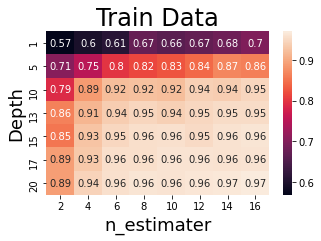

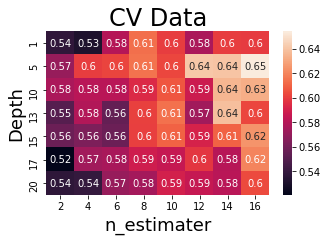

best depth =  {'max_depth': 5, 'n_estimators': 16}


In [ ]:
gd(X_tr,X_te)

In [ ]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_tr,y_train)
pred = rf.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy is %f%%' % (acc))


****Test accuracy is 82.453228%


In [ ]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))


classification_report
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    167942
           1       0.00      0.35      0.00       106

    accuracy                           0.82    168048
   macro avg       0.50      0.59      0.45    168048
weighted avg       1.00      0.82      0.90    168048



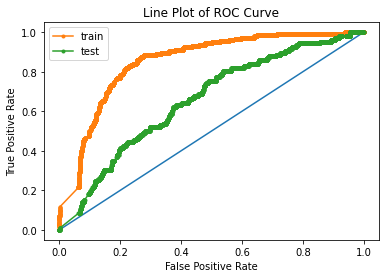

In [ ]:
pred_proba_te=rf.predict_proba(X_te)
pred_proba_te = pred_proba_te[:, 1]
pred_proba_tr=rf.predict_proba(X_tr)
pred_proba_tr = pred_proba_tr[:, 1]


fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds


fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

#PLOT OF ROC
 # plot no skill
plt.plot([0, 1], [0, 1])
 # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
 #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()


In [ ]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,138524,29418
positive,69,37


##**Final Observation**
- consider the target value over_18 or not
- model work correct for negative class
- need to do some thing special to manage positive class
- data set is imbalance

